In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from products.plot_settings import METEOFRANCE_VAR_NAME,NASA_L3_VAR_NAME,NASA_PSEUDO_L3_VAR_NAME
analysis_folder = '/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_3/analyses/uncertainty'
mf_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_meteofrance_l3_res_375m.nc", decode_cf=True)
nasa_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_l3_res_375m.nc", decode_cf=True)
nasa_pseudo_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_pseudo_l3_res_375m.nc", decode_cf=True)
analyses_dict = {METEOFRANCE_VAR_NAME: mf_metrics_ds, NASA_PSEUDO_L3_VAR_NAME: nasa_pseudo_l3_metrics_ds, NASA_L3_VAR_NAME: nasa_l3_metrics_ds}

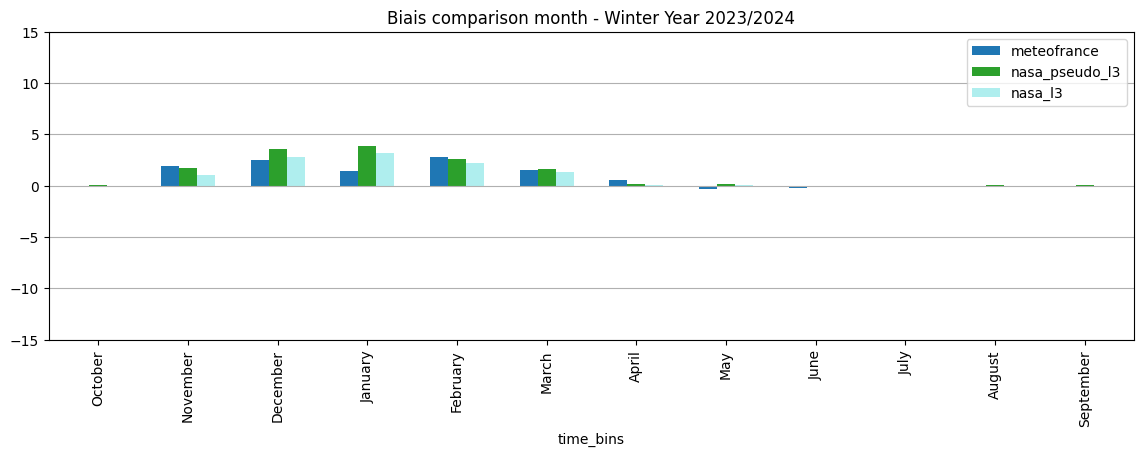

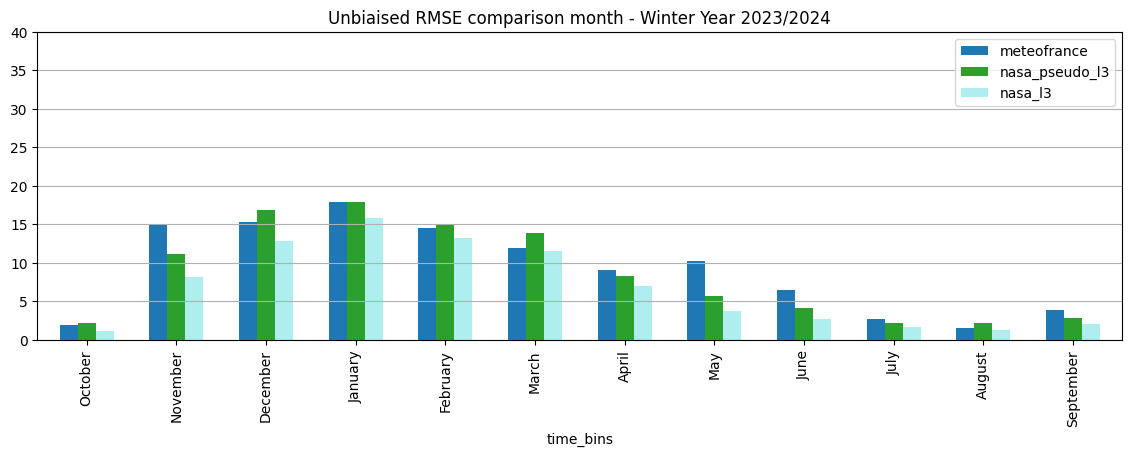

In [93]:
from evaluations.statistics_base import EvaluationVsHighResBase
from winter_year import WinterYear
from evaluations.uncertainty import  biais_barplots, postprocess_uncertainty_analysis, unbiaised_rmse_barplots

wy = WinterYear(2023,2024)
biais_barplots(postprocess_uncertainty_analysis(analyses_dict, analysis_var={'time':EvaluationVsHighResBase.month_bins(wy)}), analysis_var_plot_name='month', winter_year=wy)
unbiaised_rmse_barplots(postprocess_uncertainty_analysis(analyses_dict, analysis_var={'time':EvaluationVsHighResBase.month_bins(wy)}), analysis_var_plot_name='month', winter_year=wy)

In [104]:
mf_metrics_ds.sel(ref_bins=slice(1,None))

<xarray.Dataset> Size: 422MB
Dimensions:             (biais_bins: 201, ref_bins: 3, sensor_zenith_bins: 6,
                         slope_bins: 4, aspect_bins: 8, altitude_bins: 6,
                         time: 76)
Coordinates:
  * biais_bins          (biais_bins) int64 2kB -100 -99 -98 -97 ... 97 98 99 100
  * ref_bins            (ref_bins) int64 24B 99 100 205
  * sensor_zenith_bins  (sensor_zenith_bins) int64 48B 15 30 45 60 75 255
    forest_mask         float32 4B 0.0
  * slope_bins          (slope_bins) int64 32B 10 30 50 90
  * aspect_bins         (aspect_bins) <U2 64B 'N' 'NE' 'E' ... 'SW' 'W' 'NW'
  * altitude_bins       (altitude_bins) int64 48B 900 1500 2100 2700 3300 4800
  * time                (time) datetime64[ns] 608B 2024-01-21 ... 2024-04-13
Data variables:
    n_occurrences       (time, biais_bins, ref_bins, sensor_zenith_bins, slope_bins, aspect_bins, altitude_bins) float64 422MB ...

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from products.plot_settings import METEOFRANCE_VAR_NAME,NASA_L3_VAR_NAME,NASA_PSEUDO_L3_VAR_NAME
analysis_folder = '/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_3/analyses/uncertainty_test'
mf_metrics_ds = xr.load_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_meteofrance_l3_res_375m.nc", decode_cf=True).sel(forest_mask=0)
nasa_l3_metrics_ds = xr.load_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_l3_res_375m.nc", decode_cf=True).sel(forest_mask=0)
nasa_pseudo_l3_metrics_ds = xr.load_dataset(f"{analysis_folder}/uncertainty_WY_2023_2024_SNPP_nasa_pseudo_l3_res_375m.nc", decode_cf=True).sel(forest_mask=0)
analyses_dict = {METEOFRANCE_VAR_NAME: mf_metrics_ds, NASA_PSEUDO_L3_VAR_NAME: nasa_pseudo_l3_metrics_ds, NASA_L3_VAR_NAME: nasa_l3_metrics_ds}


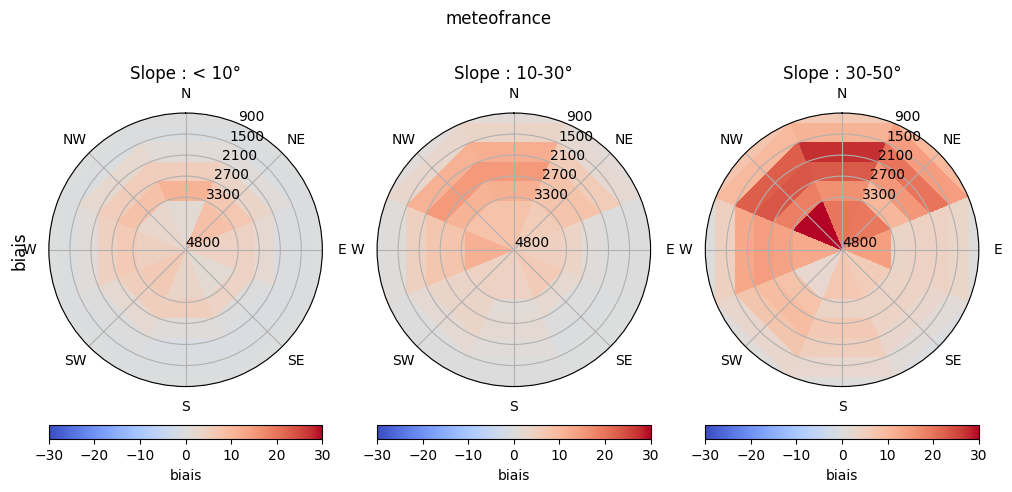

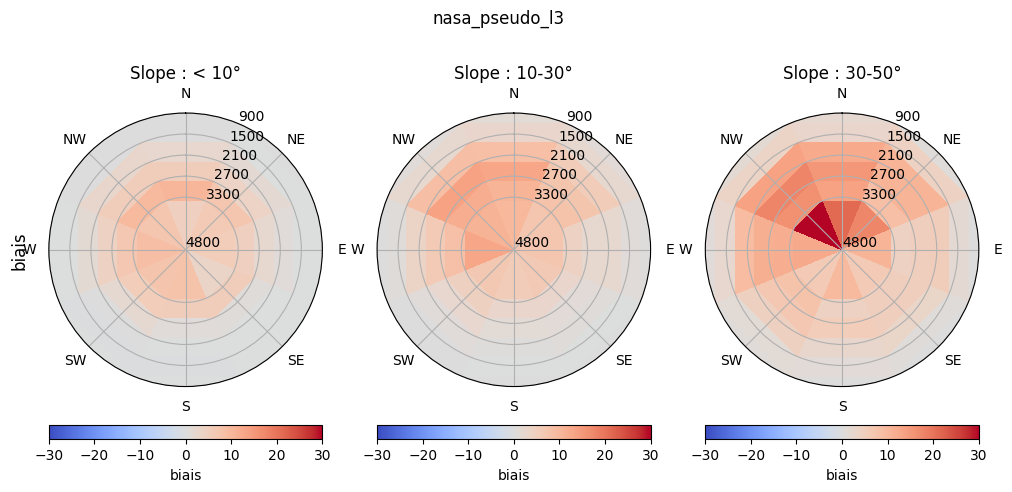

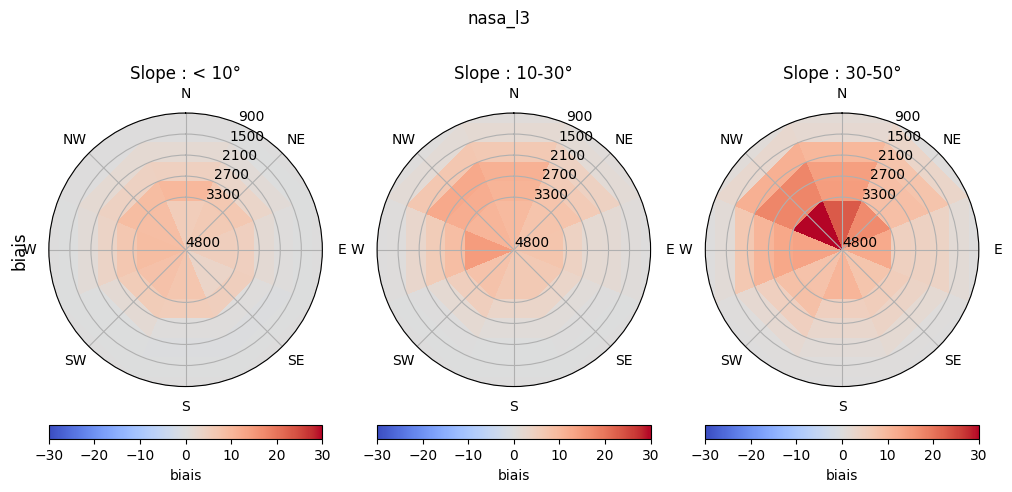

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from evaluations.statistics_base import EvaluationVsHighResBase
from evaluations.uncertainty import histograms_to_biais_rmse

variable = 'biais'
slope_titles = ['< 10', '10-30', '30-50']
for product_name,dataset in analyses_dict.items():
    fig, ax = plt.subplots(1,3,figsize=(12,5),subplot_kw=dict(projection='polar'))
    dataset_reduced = dataset.groupby(['slope_bins', 'aspect_bins', 'altitude_bins']).map(histograms_to_biais_rmse).reindex_like(dataset)
    for i,slope in enumerate(dataset_reduced.coords['slope_bins'].values[:3]):
        ax[i].set_theta_direction(-1)
        ax[i].set_theta_zero_location('N')
        ax[i].set_xticks(np.deg2rad(EvaluationVsHighResBase.aspect_bins().bins[1:] - 22.5))
        ax[i].set_xticklabels(dataset.coords['aspect_bins'].values)
        ax[i].set_rticks(dataset.coords['altitude_bins'].values)
        ax[i].set_rlim(dataset.coords['altitude_bins'].values[-1],dataset.coords['altitude_bins'].values[0])
        ax[i].set_title('Slope : '+slope_titles[i]+'°')
        ax[0].set_ylabel(variable, labelpad = 15, fontsize = 12)

        im = ax[i].pcolor(np.deg2rad(EvaluationVsHighResBase.aspect_bins().bins),
                        np.array([0,*dataset.coords['altitude_bins'].values]),
                        dataset_reduced.data_vars[variable].sel(slope_bins = slope).transpose().values, 
                        cmap = 'coolwarm',
                        vmin=-30,
                        vmax=30)

        fig.colorbar(im,ax = ax[i], orientation = 'horizontal', label = variable, fraction = 0.05, pad = 0.1)
        fig.suptitle(product_name)
        

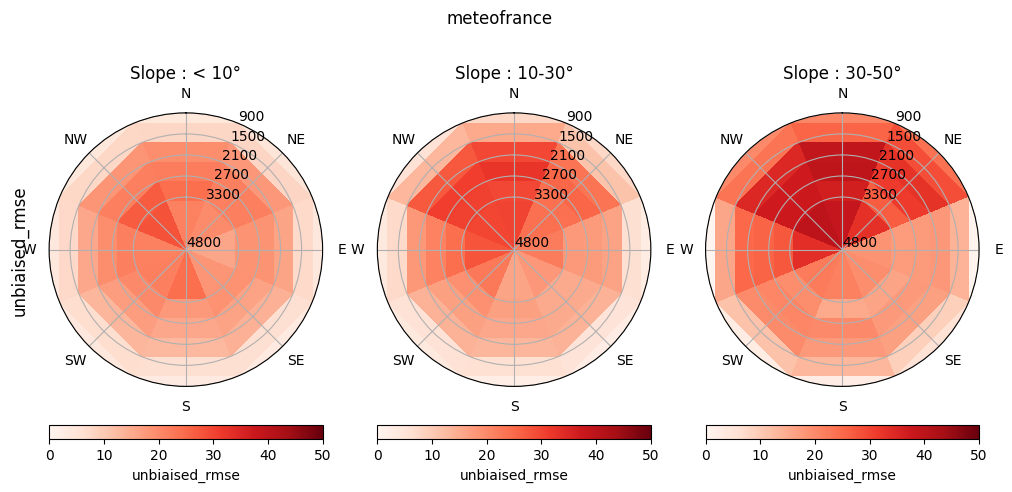

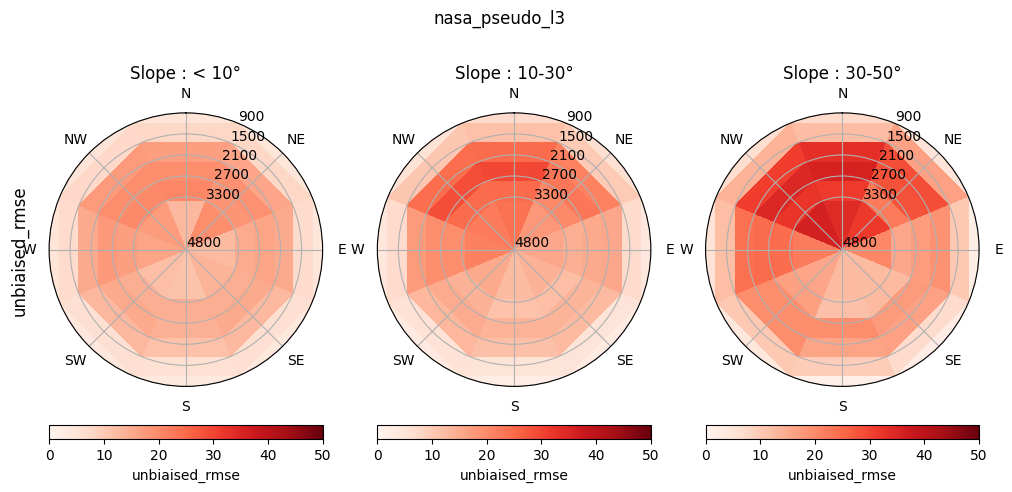

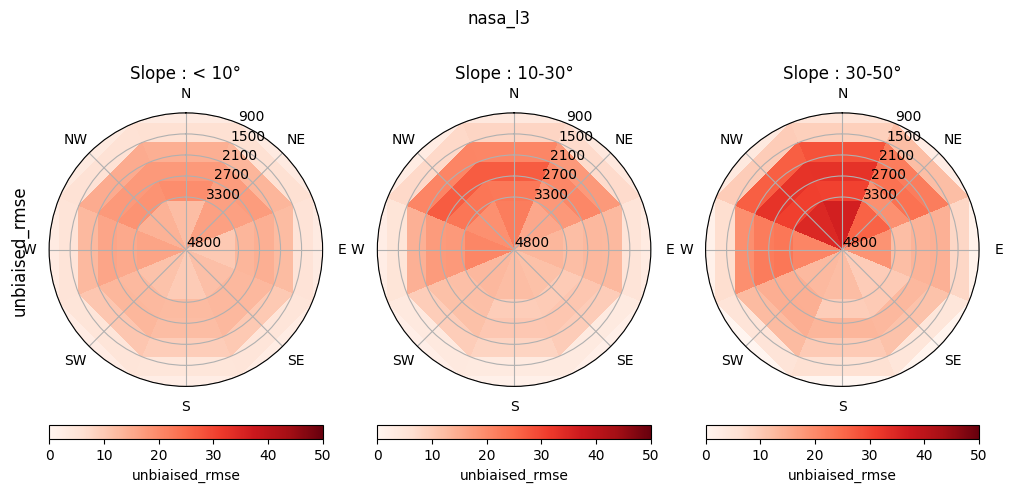

In [3]:
variable = 'unbiaised_rmse'
for product_name,dataset in analyses_dict.items():
    fig, ax = plt.subplots(1,3,figsize=(12,5),subplot_kw=dict(projection='polar'))
    dataset_reduced = dataset.groupby(['slope_bins', 'aspect_bins', 'altitude_bins']).map(histograms_to_biais_rmse).reindex_like(dataset)
    for i,slope in enumerate(dataset_reduced.coords['slope_bins'].values[:3]):
        ax[i].set_theta_direction(-1)
        ax[i].set_theta_zero_location('N')
        ax[i].set_xticks(np.deg2rad(EvaluationVsHighResBase.aspect_bins().bins[1:] - 22.5))
        ax[i].set_xticklabels(dataset.coords['aspect_bins'].values)
        ax[i].set_rticks(dataset.coords['altitude_bins'].values)
        ax[i].set_rlim(dataset.coords['altitude_bins'].values[-1],dataset.coords['altitude_bins'].values[0])
        ax[i].set_title('Slope : '+slope_titles[i]+'°')
        ax[0].set_ylabel(variable, labelpad = 15, fontsize = 12)

        im = ax[i].pcolor(np.deg2rad(EvaluationVsHighResBase.aspect_bins().bins),
                        np.array([0,*dataset.coords['altitude_bins'].values]),
                        dataset_reduced.data_vars[variable].sel(slope_bins = slope).transpose().values, 
                        cmap = 'Reds',
                        vmin=0,
                        vmax=50)

        fig.colorbar(im,ax = ax[i], orientation = 'horizontal', label = variable, fraction = 0.05, pad = 0.1)
        fig.suptitle(product_name)

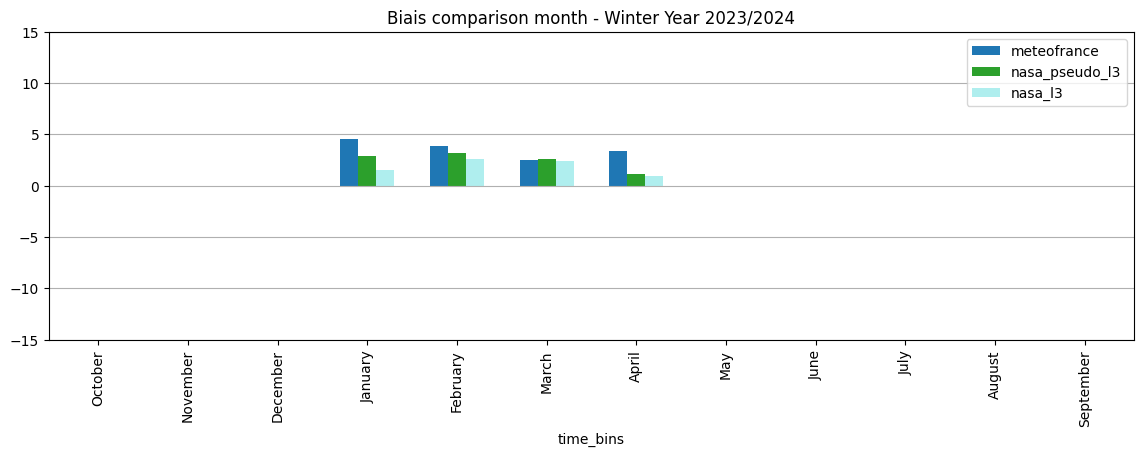

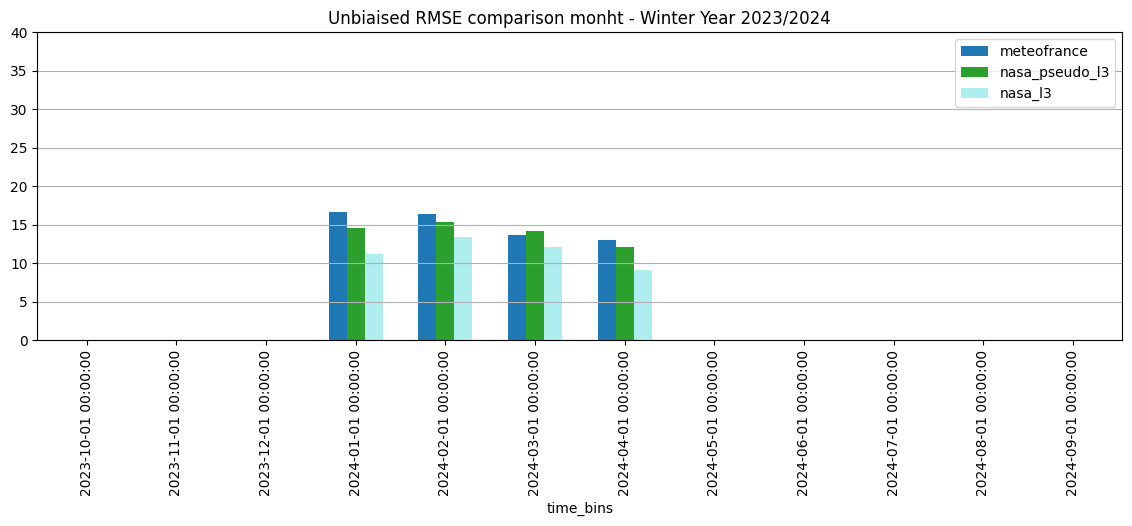

In [4]:
from evaluations.statistics_base import EvaluationVsHighResBase
from winter_year import WinterYear
from evaluations.uncertainty import  biais_barplots, postprocess_uncertainty_analysis, unbiaised_rmse_barplots

wy = WinterYear(2023,2024)
biais_barplots(postprocess_uncertainty_analysis(analyses_dict, analysis_var={'time':EvaluationVsHighResBase.month_bins(wy)}), analysis_var_plot_name='month', winter_year=wy)
unbiaised_rmse_barplots(postprocess_uncertainty_analysis(analyses_dict, analysis_var={'time':EvaluationVsHighResBase.month_bins(wy)}), analysis_var_plot_name='monht', winter_year=wy)

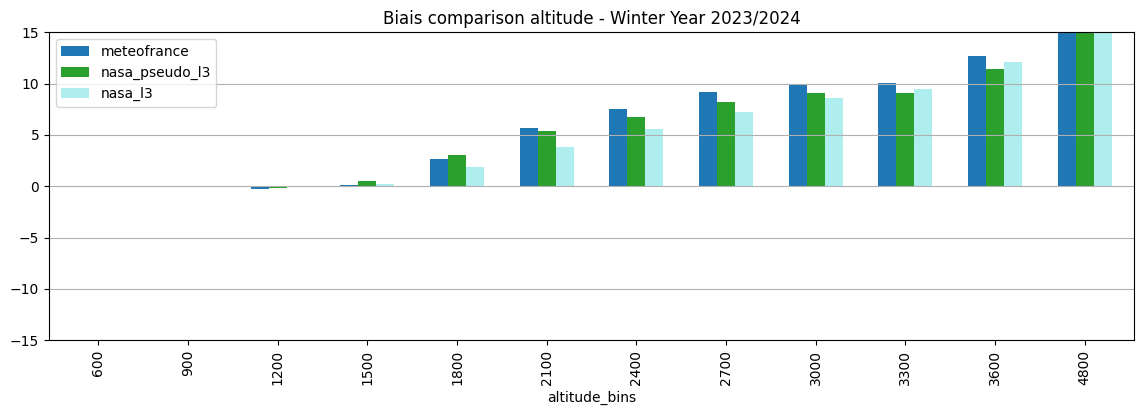

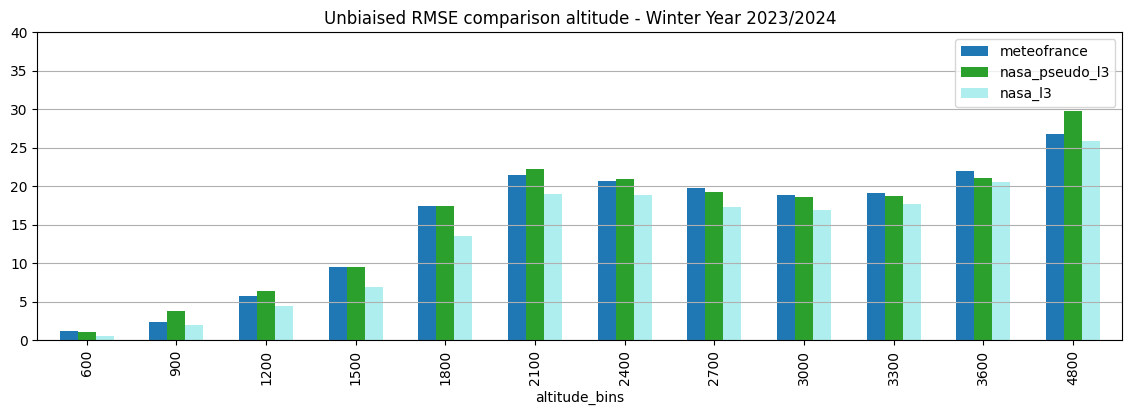

In [55]:
from evaluations.statistics_base import EvaluationVsHighResBase
from winter_year import WinterYear
from evaluations.uncertainty import  biais_barplots, postprocess_uncertainty_analysis, unbiaised_rmse_barplots

wy = WinterYear(2023,2024)
biais_barplots(postprocess_uncertainty_analysis(analyses_dict, analysis_var='altitude_bins'), analysis_var_plot_name='altitude', winter_year=wy)
unbiaised_rmse_barplots(postprocess_uncertainty_analysis(analyses_dict, analysis_var='altitude_bins'), analysis_var_plot_name='altitude', winter_year=wy)

In [2]:
import matplotlib.axes
import numpy as np
import matplotlib
def histograms_to_boxplot(metrics_ds : xr.Dataset, ax: matplotlib.axes.Axes):

    # def repeat_fun(metrics_ds):
    #     return np.repeat(metrics_ds['biais_bins'], repeats=metrics_ds['n_occurrences'])
    all_dims = list(metrics_ds.sizes.keys())
    all_dims.remove('biais_bins')
    metrics_squeezed = metrics_ds.sum(dim=all_dims)
    #data_to_plot = np.repeat(mf_metrics_ds.coords['biais_bins'], metrics_squeezed['n_occurrences'])
    data_to_plot = np.repeat(mf_metrics_ds.coords['biais_bins'], metrics_squeezed['n_occurrences'])
    return xr.Dataset(ax.boxplot(data_to_plot,widths=3, positions=[metrics_ds.coords['sensor_zenith_bins'].values[0]]))


/home/imperatoren/miniconda3/envs/viirs_env/lib/python3.12/site-packages/xarray/core/indexes.py:822: RuntimeWarning: '<' not supported between instances of 'Line2D' and 'Line2D', sort order is undefined for incomparable objects.
  index = self.index.union(other.index)


<xarray.Dataset> Size: 512B
Dimensions:             (whiskers: 16, caps: 16, boxes: 8, medians: 8,
                         fliers: 8, means: 0, sensor_zenith_bins: 8)
Coordinates:
  * whiskers            (whiskers) object 128B Line2D(_nolegend_) ... Line2D(...
  * caps                (caps) object 128B Line2D(_nolegend_) ... Line2D(_nol...
  * boxes               (boxes) object 64B Line2D(_child0) ... Line2D(_child49)
  * medians             (medians) object 64B Line2D(_nolegend_) ... Line2D(_n...
  * fliers              (fliers) object 64B Line2D(_nolegend_) ... Line2D(_no...
  * means               (means) float64 0B 
  * sensor_zenith_bins  (sensor_zenith_bins) int64 64B 10 20 30 40 50 60 70 80
Data variables:
    *empty*

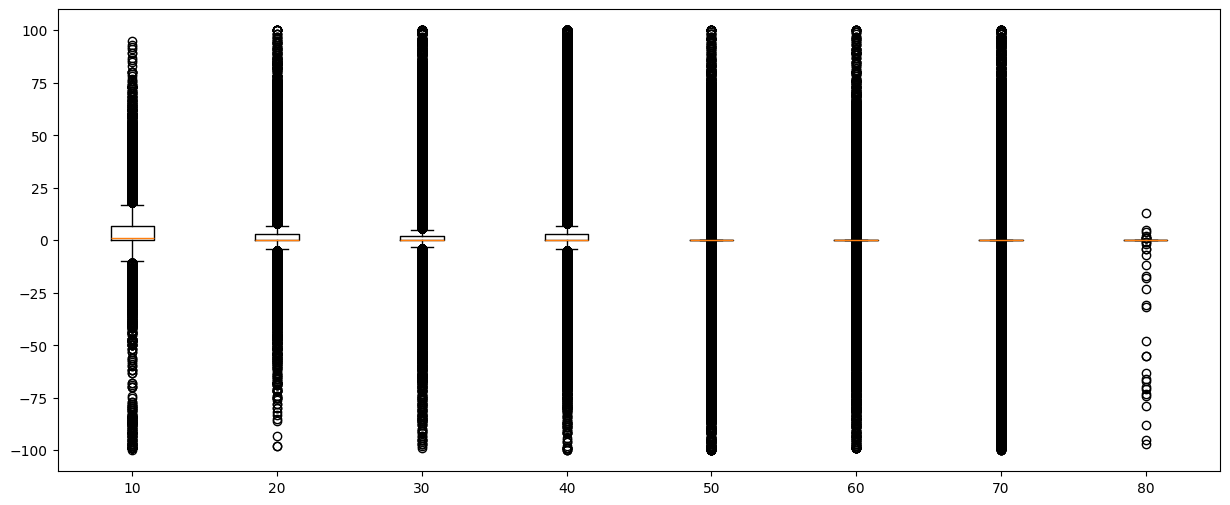

In [3]:
fig, ax = plt.subplots(figsize=(15,6))
mf_metrics_ds.isel(sensor_zenith_bins=slice(None, -1)).groupby('sensor_zenith_bins').map(histograms_to_boxplot, ax = ax)